# ---------------   ML- Linear Regression, Ridge, Lasso Algo -------------------

## Boston House Pricing:

* Here, I used boston housing dataset, not from the scikit learn as it is not available in Libraries now. 
* Dataset is from the gitbub url. and it works complete fine with linear algo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [27]:
df.shape

(506, 14)

In [28]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [29]:
# Dividing the dataset Independent & dependent features:

X=df.iloc[:,:-1]   # Independent Feature
y=df.iloc[:, -1]  # Dependent feature

In [30]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [31]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [32]:
X.shape

(506, 13)

In [33]:
y.shape

(506,)

In [34]:
# Train_test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [36]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 354, dtype: float64

In [37]:
# Standardizing the datset:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

## ------------- Linear Regression: -------------

In [40]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [41]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [42]:
from sklearn.linear_model import LinearRegression

# Cross validation algo:

from sklearn.model_selection import cross_val_score

In [43]:
# regression = LinearRegression()
# regression.fit(X_train, y_train)

In [44]:
X.shape

(506, 13)

In [45]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [46]:
X_train.shape
y_train.shape

(354,)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
mse=cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-25.977777430926302


In [89]:
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

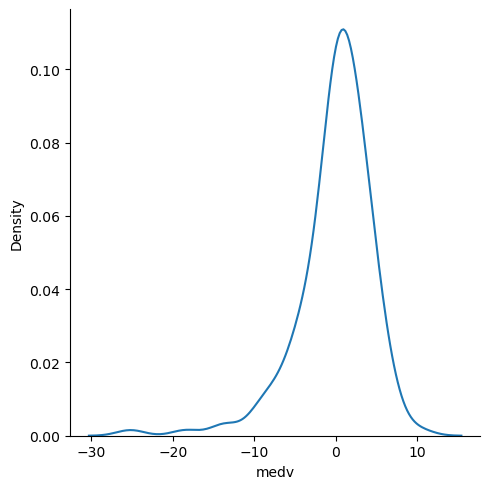

In [90]:
import seaborn as sns
sns.displot(y_pred-y_test, kind='kde')

In [87]:
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score

r2_score_linear = r2_score(y_pred, y_test)

In [88]:
print(r2_score_linear)

0.6693702691495591


## --------------------- Ridge Regression:  --------------------

In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor=  GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [92]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-25.41980963261336


In [95]:
y_pred

array([28.4134954 , 36.07453577, 16.17164021, 25.30868069, 18.80946202,
       23.13610281, 17.61393934, 14.38360489, 22.53627218, 20.76952254,
       24.66003705, 18.89604804, -6.22947589, 21.96166951, 19.30921109,
       25.85720057, 19.58612918,  5.69547314, 39.88738352, 17.56727832,
       27.14663855, 29.65696101, 11.44350098, 24.11125603, 17.95711934,
       15.57428959, 23.12734966, 14.75101298, 22.43522694, 19.54923792,
       21.98108708, 25.21097849, 25.13554702, 18.36676527, 16.33620525,
       17.94437716, 30.95709893, 20.30635001, 24.04235565, 24.83020506,
       14.25723626, 31.13073416, 41.6638407 , 17.98419612, 27.01273195,
       17.01890841, 14.15348536, 26.05436703, 19.99814799, 30.25499968,
       21.54267256, 33.72177452, 16.00637844, 26.24691138, 38.87355943,
       22.75281202, 18.90407683, 32.36945892, 24.89966226, 13.35872194,
       22.91082359, 30.60280217, 31.24730093, 16.556512  , 22.02834711,
       16.75198858, 20.20417162, 26.06542713, 30.62889806, 12.09

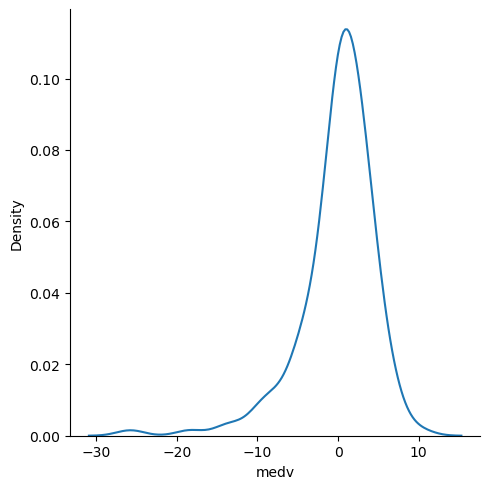

In [96]:
import seaborn as sns
sns.displot(y_pred-y_test, kind='kde')

In [93]:
y_pred = ridge_regressor.predict(X_test)

from sklearn.metrics import r2_score

r2_score_ridge = r2_score(y_pred, y_test)

In [94]:
print(r2_score_ridge)

0.6468557055633648


## --------------------  Lasso Regression  --------------------

In [97]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1,5,10,20,30,35,40,45,50,55,100]}

lasso_regressor=  GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train,y_train)

C:\Users\amita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+02, tolerance: 2.851e+00
  positive,
C:\Users\amita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+02, tolerance: 2.650e+00
  positive,
C:\Users\amita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.542e+02, tolerance: 2.884e+00
  positive,
C:\Users\amita\anaconda3\lib\site-pac

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [98]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-25.550660791660814


In [100]:
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

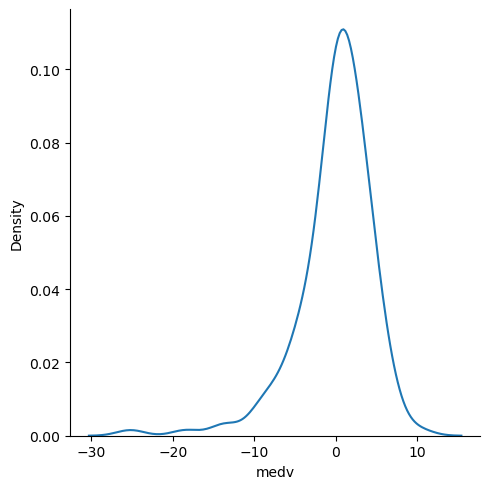

In [101]:
import seaborn as sns
sns.displot(y_pred-y_test, kind='kde')

In [99]:
y_pred = lasso_regressor.predict(X_test)

from sklearn.metrics import r2_score

r2_score_lasso = r2_score(y_pred, y_test)

In [82]:
print(r2_score_lasso)

0.6693702691495615
